# Revisão de código 

Olá! 

Meu nome é Suelen. Estou feliz em revisar seu projeto hoje!

Quando vejo um erro pela primeira vez, apenas aponto. Deixarei você encontrá-lo e corrigi-lo sozinho. Além disso, ao longo do texto, farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Mas se você ainda não consegue lidar com essa tarefa, darei uma dica mais precisa na próxima iteração e também alguns exemplos práticos. Estarei aberta a feedbacks e discussões sobre o tema.

Você pode encontrar meus comentários em caixas verdes, amarelas ou vermelhas como estas:


<div class="alert alert-block alert-success">
<b>Comentário: </b> <a class="tocSkip"></a>

Sucesso. Tudo está correto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário: </b> <a class="tocSkip"></a>

Observações. Algumas recomendações.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário: </b> <a class="tocSkip"></a>

O bloco requer algumas correções. O trabalho não pode ser aceito com os comentários vermelhos.
</div>

Você pode me responder usando isto:

<div class="alert alert-block alert-info">
<b>Resposta do aluno</b> <a class="tocSkip"></a>
</div>



<div class="alert alert-block alert-success">

<b>Comentário geral: </b> <a class="tocSkip"></a>

Parabéns pela excelente conclusão do projeto, Vitor! 🎉 Seu projeto está com uma qualidade ótima.
Adicionei apenas alguns comentários com sugestões e dicas para te ajudar a brilhar ainda mais.
    
Continue com esse trabalho incrível! 🔆 

</div>

# Carregamento e visualização dos dados

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

In [2]:
df = pd.read_csv('/datasets/Churn.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


# preenchendo valores nulos com a mediana

In [5]:
tenure_median = df['Tenure'].median()
df['Tenure'] = df['Tenure'].fillna(tenure_median)

In [6]:
df.duplicated().sum()

0

<div class="alert alert-block alert-success">

<b>Comentário: </b> <a class="tocSkip"></a>

- Dados foram carregados corretamente. 
- Análise de dados nulos feita com sucesso
    
    
Sugestões: 
    
- Caso você tenha interesse em experimentar outras formas de imputação de dados nulos, recomendo a leitura: https://www.datacamp.com/tutorial/techniques-to-handle-missing-data-values. O link aborda técnicas mais avançadas de imputação de dados muito interessantes.  

</div>

# analisando o balanço das classes

In [7]:
df['Exited'].value_counts(normalize = True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

# dados categóricos para numéricos

In [8]:
features = pd.get_dummies(df.drop('Exited', axis=1), drop_first=True)
target = df['Exited']

**com dados categoricos no dataframe nao conseguimos treinar o modelo por isso transformamos em numericos antes**

# Dividindo dados em conjuntos de: treino , validação e teste

In [9]:
features_train, features_temp, target_train, target_temp = train_test_split(
    features, target, test_size=0.4, random_state=12345
)

# Dividir temporário em validação (20%) e teste (20%)
features_valid, features_test, target_valid, target_test = train_test_split(
    features_temp, target_temp, test_size=0.5, random_state=12345
)

<div class="alert alert-block alert-success">

<b>Comentário: </b> <a class="tocSkip"></a>

Divisão dos dados realizada corretamente.

</div>

# Treinamento de modelos

# DecisionTreeClassifier

In [10]:
best_f1 = 0
best_depth = 0
best_leaf = 0

for depth in range(1, 11):
    for leaf in range(1, 11):  # Testar min_samples_leaf
        model = DecisionTreeClassifier(
            random_state=12345,
            max_depth=depth,
            min_samples_leaf=leaf
        )
        model.fit(features_train, target_train)  
        predicted_valid = model.predict(features_valid)
        f1 = f1_score(target_valid, predicted_valid)
        if f1 > best_f1:
            best_f1 = f1
            best_depth = depth
            best_leaf = leaf

print(f"Melhor F1 Score (Decision Tree sem upsampling): {best_f1:.3f}")
print(f"Melhor max_depth: {best_depth}")
print(f"Melhor min_samples_leaf: {best_leaf}")

Melhor F1 Score (Decision Tree sem upsampling): 0.595
Melhor max_depth: 9
Melhor min_samples_leaf: 1


**modelo treinado sem balanceamento de classes no primeiro momento**

In [11]:
for depth in range(1, 11):
    for leaf in range(1, 11):  # Testar min_samples_leaf
        model = DecisionTreeClassifier(
            random_state=12345,
            max_depth=depth,
            min_samples_leaf=leaf,
            class_weight='balanced'  # Balancear classes
        )
        model.fit(features_train, target_train)  
        predicted_valid = model.predict(features_valid)
        f1 = f1_score(target_valid, predicted_valid)
        if f1 > best_f1:
            best_f1 = f1
            best_depth = depth
            best_leaf = leaf

print(f"Melhor F1 Score (Decision Tree com class_weight='balanced'): {best_f1:.3f}")
print(f"Melhor max_depth: {best_depth}")
print(f"Melhor min_samples_leaf: {best_leaf}")

Melhor F1 Score (Decision Tree com class_weight='balanced'): 0.602
Melhor max_depth: 5
Melhor min_samples_leaf: 9


**O modelo foi treinado com o hiperparâmetro class_weight='balanced' para ajustar os pesos das classes, compensando o desbalanceamento (80% classe 0, 20% classe 1). Isso permitiu ao modelo identificar os valores verdadeiros da classe minoritária com maior precisão, melhorando sua performance geral**

In [12]:

def upsample(features_train, target_train, repeat):
    features_zeros = features_train[target_train == 0]
    features_ones = features_train[target_train == 1]
    target_zeros = target_train[target_train == 0]
    target_ones = target_train[target_train == 1]
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    return shuffle(features_upsampled, target_upsampled, random_state=12345)

features_up, target_up = upsample(features_train, target_train, 4)

In [13]:
best_f1 = 0
best_depth = 0
best_leaf = 0

for depth in range(1, 11):
    for leaf in range(1, 11):  # Testar min_samples_leaf
        model = DecisionTreeClassifier(
            random_state=12345,
            max_depth=depth,
            min_samples_leaf=leaf
        )
        model.fit(features_up, target_up)  # Usar dados upsampled
        predicted_valid = model.predict(features_valid)
        f1 = f1_score(target_valid, predicted_valid)
        if f1 > best_f1:
            best_f1 = f1
            best_depth = depth
            best_leaf = leaf

print(f"Melhor F1 Score (Decision Tree com upsampling): {best_f1:.3f}")
print(f"Melhor max_depth: {best_depth}")
print(f"Melhor min_samples_leaf: {best_leaf}")

Melhor F1 Score (Decision Tree com upsampling): 0.601
Melhor max_depth: 5
Melhor min_samples_leaf: 1


**Nesta etapa, aplicamos o método de upsampling para balancear a classe minoritária (20% dos dados) no conjunto de treinamento, replicando suas amostras e equilibrando a proporção com a classe majoritária (80%). Isso permitiu otimizar o treinamento do modelo, melhorando sua capacidade de identificar a classe minoritária de forma eficaz**

# RandomForestClassifier

In [16]:
best_f1 = 0
best_est = 0
best_depth = 0

for est in range(1, 101, 5 ):    # Número de árvores
    for depth in range(1, 11):  # Profundidade máxima
        model = RandomForestClassifier(
            random_state=12345,
            n_estimators=est,
            max_depth=depth
        )
        model.fit(features_train, target_train)  
        predicted_valid = model.predict(features_valid)
        f1 = f1_score(target_valid, predicted_valid)
        if f1 > best_f1:
            best_f1 = f1
            best_est = est
            best_depth = depth

print(f"Melhor F1 Score (Random Forest sem upsampling): {best_f1:.3f}")
print(f"Melhor n_estimators: {best_est}")
print(f"Melhor max_depth: {best_depth}")

Melhor F1 Score (Random Forest sem upsampling): 0.009
Melhor n_estimators: 1
Melhor max_depth: 5


**Modelo treinado sem balancemanto de classes**

In [17]:
best_f1 = 0
best_est = 0
best_depth = 0

for est in range(1, 101, 5):    # Número de árvores
    for depth in range(1, 11):  # Profundidade máxima
        model = RandomForestClassifier(
            random_state=12345,
            n_estimators=est,
            max_depth=depth,
            class_weight='balanced'
        )
        model.fit(features_train, target_train)  
        predicted_valid = model.predict(features_valid)
        f1 = f1_score(target_valid, predicted_valid)
        if f1 > best_f1:
            best_f1 = f1
            best_est = est
            best_depth = depth

print(f"Melhor F1 Score (Random Forest sem upsampling): {best_f1:.3f}")
print(f"Melhor n_estimators: {best_est}")
print(f"Melhor max_depth: {best_depth}")

Melhor F1 Score (Random Forest sem upsampling): 0.568
Melhor n_estimators: 21
Melhor max_depth: 10


**Foi usado o hiperparametro 'class_weight' para conseguirmos balancear melhor os pesos das classes e achar um resultado mais real**

In [18]:
features_up, target_up = upsample(features_train, target_train, 4)
best_f1 = 0
best_est = 0
best_depth = 0


for est in range(1, 101,5):  
    for depth in range(1, 11):  
        model = RandomForestClassifier(
            random_state=12345,
            n_estimators=est,
            max_depth=depth
        )
        model.fit(features_up, target_up)
        
        # Calcular F1 no conjunto de validação
        predicted_valid = model.predict(features_valid)
        f1 = f1_score(target_valid, predicted_valid)
        
        if f1 > best_f1:
            best_f1 = f1
            best_est = est
            best_depth = depth

print(f"Melhor F1 Score (Random Forest com upsampling): {best_f1:.3f}")
print(f"Melhor n_estimators: {best_est}")
print(f"Melhor max_depth: {best_depth}")

Melhor F1 Score (Random Forest com upsampling): 0.553
Melhor n_estimators: 61
Melhor max_depth: 10


**Usamos o metodo de upsampling no qual aumentamos as amostras da classe minoritaria para melhorar a precisão do nosso modelo e achar valores '1' com mais exatidão**

# LogisticRegression

In [19]:
scaler = StandardScaler()
numeric_cols = features.select_dtypes(include=['float64', 'int64']).columns
features[numeric_cols] = scaler.fit_transform(features[numeric_cols])

# Treinar Logistic Regression 
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)

# Prever e calcular F1 no conjunto de validação
predicted_valid = model.predict(features_valid)
f1 = f1_score(target_valid, predicted_valid)

# Verificar as previsões
print(f"Previsões únicas: {np.unique(predicted_valid)}")
print(f"F1 Score (Logistic Regression sem upsampling): {f1:.3f}")

Previsões únicas: [0]
F1 Score (Logistic Regression sem upsampling): 0.000


**o modelo de logistic regression não consegue prever os positivos por causa do desbalanceamento de classes**

In [20]:
scaler = StandardScaler()
numeric_cols = features.select_dtypes(include=['float64', 'int64']).columns
features[numeric_cols] = scaler.fit_transform(features[numeric_cols])

# Treinar Logistic Regression com class_weight='balanced'
model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)

# Prever e calcular F1 no conjunto de validação
predicted_valid = model.predict(features_valid)
f1 = f1_score(target_valid, predicted_valid)

# Verificar as previsões
print(f"Previsões únicas: {np.unique(predicted_valid)}")
print(f"F1 Score (Logistic Regression sem upsampling): {f1:.3f}")

Previsões únicas: [0 1]
F1 Score (Logistic Regression sem upsampling): 0.504


**Por meio do parâmetro de balanceamento class_weight='balanced', ajustamos os pesos das classes no modelo, compensando o desbalanceamento de 80% (classe 0) e 20% (classe 1). Isso resultou em uma identificação mais precisa da classe minoritária, alcançando um desempenho mais alinhado ao objetivo do projeto**

In [21]:
features_up, target_up = upsample(features_train, target_train, 4)
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_up, target_up)

# Calcular F1 no conjunto de validação
predicted_valid = model.predict(features_valid)
f1 = f1_score(target_valid, predicted_valid)

print(f"F1 Score (Logistic Regression com upsampling) no conjunto de validação: {f1:.3f}")

F1 Score (Logistic Regression com upsampling) no conjunto de validação: 0.492


**Utilizamos o método de upsampling para balancear o conjunto de treinamento, replicando as amostras da classe minoritária (20%) até aproximar a proporção da classe majoritária (80%). Essa técnica melhorou o aprendizado do modelo em relação à classe minoritária, aumentando sua capacidade de identificar corretamente os casos positivos**

# DecisionTree melhor modelo: agora conjunto de teste como prova real


In [22]:
best_f1 = 0
best_depth = 0
best_threshold = 0

for depth in range(1, 11):  # 1 a 9
    model = DecisionTreeClassifier(
        random_state=12345,
        max_depth=depth,
        min_samples_leaf=1,
        class_weight='balanced'
    )
    model.fit(features_train, target_train)
    
    # Obter probabilidades pra classe 1
    probabilities_test = model.predict_proba(features_test)[:, 1]
    
    # Testar diferentes thresholds
    for threshold in np.arange(0.3, 0.8, 0.05):
        predicted_test = probabilities_test > threshold
        f1 = f1_score(target_test, predicted_test)
        if f1 > best_f1:
            best_f1 = f1
            best_depth = depth
            best_threshold = threshold

print(f"Melhor F1 Score (Decision Tree): {best_f1:.3f}")
print(f"Melhor max_depth: {best_depth}")
print(f"Melhor threshold: {best_threshold:.2f}")

Melhor F1 Score (Decision Tree): 0.604
Melhor max_depth: 5
Melhor threshold: 0.60


**Além de usarmos o hiperparâmetro de balanceamento de pesos das classes (class_weight='balanced'), para alcançar um F1 acima de 0.59, foi necessário ajustar o limiar de classificação para 0.60. Isso melhorou a média harmônica entre precisão (a proporção de previsões '1' que estavam corretas, ou seja, verdadeiros positivos divididos por todos os previstos como 1) e sensibilidade (a proporção de valores '1' reais que o modelo identificou, ou seja, verdadeiros positivos divididos pelo total de 1 reais, que inclui verdadeiros positivos e falsos negativos).**

<div class="alert alert-block alert-success">

<b>Comentário: </b> <a class="tocSkip"></a>
    
Bom uso do class_weight e da técnica de upsample.

# Uso da métrica AUC-ROC no modelo escolhido

In [23]:
best_f1 = 0
best_depth = 0
best_threshold = 0
best_auc = 0

for depth in range(1, 11):  
    model = DecisionTreeClassifier(
        random_state=12345,
        max_depth=depth,
        min_samples_leaf=1,
        class_weight='balanced'
    )
    model.fit(features_train, target_train)
    
    # Obter probabilidades pra classe 1
    probabilities_test = model.predict_proba(features_test)[:, 1]
    
    # Calcular AUC-ROC
    auc = roc_auc_score(target_test, probabilities_test)
    
    # Testar diferentes thresholds pra F1 (mantido pra comparação)
    for threshold in np.arange(0.3, 0.8, 0.05):
        predicted_test = probabilities_test > threshold
        f1 = f1_score(target_test, predicted_test)
        if f1 > best_f1:
            best_f1 = f1
            best_depth = depth
            best_threshold = threshold
            best_auc = auc  

print(f"Melhor F1 Score (Decision Tree): {best_f1:.3f}")
print(f"Melhor AUC-ROC (Decision Tree): {best_auc:.3f}")
print(f"Melhor max_depth: {best_depth}")
print(f"Melhor threshold: {best_threshold:.2f}")

Melhor F1 Score (Decision Tree): 0.604
Melhor AUC-ROC (Decision Tree): 0.834
Melhor max_depth: 5
Melhor threshold: 0.60


<div class="alert alert-block alert-warning">

<b>Comentário: </b> <a class="tocSkip"></a>
 
Os modelos foram treinados corretamente. 

Sugestões: 
    
- Gerar a visualização da curva ROC-AUC. Exemplo:

```python

fpr, tpr, _ = roc_curve(y_test, y_scores_RF)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Área sob a Curva (AUC) = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Linha diagonal de referência
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()
```
    
 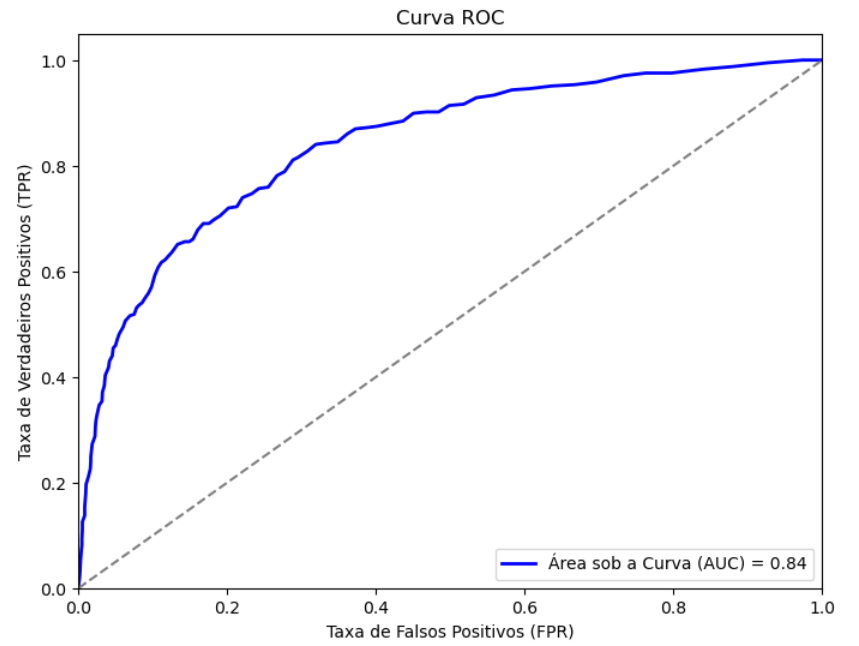   

- O modelo random forest também oferece uma função de feature importances que é muito interessante para entender o impacto de cada variável no modelo. 
    
```python
import numpy as np

importances = model_rf_balanced.feature_importances_
indexes = np.argsort(importances)[::-1]

coef = importances[indexes]

# Supondo que 'features' seja a lista de nomes das colunas
features_array = np.array(features.columns)

# Plotar gráfico de barras
fig, ax = plt.subplots(figsize=(20, 5))
sns.barplot(x=features_array[indexes], y=coef, ax=ax, color='darkblue')
plt.xticks(rotation=90)
sns.despine()

plt.title("Importância das Features - RandomForest")
plt.show()
```
    
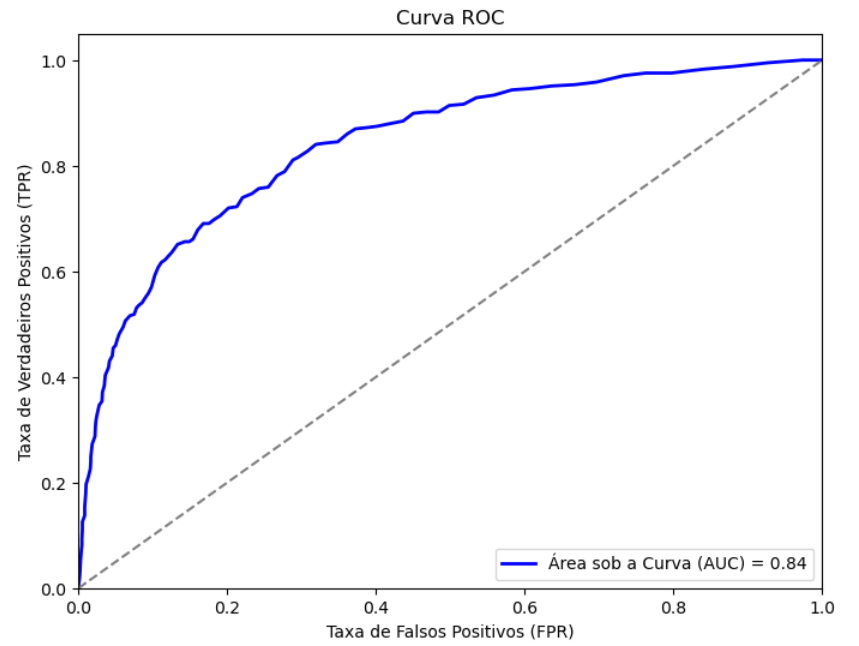

**O AUC-ROC de 0.834 demonstra uma excelente capacidade do modelo em distinguir entre as classes (0 e 1), refletindo a robustez das probabilidades previstas em todos os limiares de classificação. Diferentemente do F1, que avalia o equilíbrio entre precisão e sensibilidade para um limiar específico, o AUC-ROC oferece uma visão geral da performance do modelo, indicando sua eficácia em separar as classes independentemente do ponto de corte escolhido**

<div class="alert alert-block alert-warning">

<b>Comentário: </b> <a class="tocSkip"></a>

Apesar dos comentários após cada etapa da análise, ainda recomendo adicionar uma conclusão que englobe todos os achados do projeto. Sei que pode parecer repetitivo, mas é a oportunidade para refletirmos sobre os dados como um todo. Uma ótima prática para enriquecer ainda mais nosso senso crítico para análise de dados :) 

</div>